In [20]:
import numpy as np
import numpy.ma as ma
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt

# NDVI Calculation with sentinel hub API

def ndvi_api(file):
    
    '''
    NDVI calculation with sentinel hub API (one .tiff file)
    
    file: .tiff file of the 4 bands
        B02 (blue)
        B03 (green)
        B04 (red)
        B08 (nir)
    retun: ndvi
    '''
    
    # calculate the NDVI
    ndvi = es.normalized_diff(file[3], file[2])
    
    # plot the results
    ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Sentinel2 L2C Derived NDVI")
    plt.show()
    
    return ndvi

# Green area calculation

def green_area(ndvi,res,thresh=0.71):
    
    '''
    Calculate the green area with specific threshold values
    
    ndvi: ndvi array
    res: image resolution
    thresh: threshold value to distinguish forect/ green area
    
    return: green cover in km2
    '''
    
    # get the ndvi data from masked array
    ndvi_data = ma.getdata(ndvi)
    # get the row & col count
    rows, cols = ndvi_data.shape
    
    # replace ndvi values with 1, if ndvi >= threshold value
    for i in range(0,rows-1):
        for j in range(0,cols-1):
            if ndvi_data[i][j] >= thresh:
                ndvi_data[i][j] = 1
            else:
                ndvi_data[i][j] = 0
            
    # count the ones
    ndvi_list = ndvi_data.tolist()
    green_pixel = sum(x.count(1) for x in ndvi_list)
    
    # calculate the green area in km2
    green_area = (green_pixel*res*res)/1000000
    
    return green_area

# calculate forest/ green cover percentage with user input total area

def green_cover(green_area,total_area):
    green_cover = np.round(green_area/total_area*100,2)
    print("Forest/green cover: ",green_cover,"%")

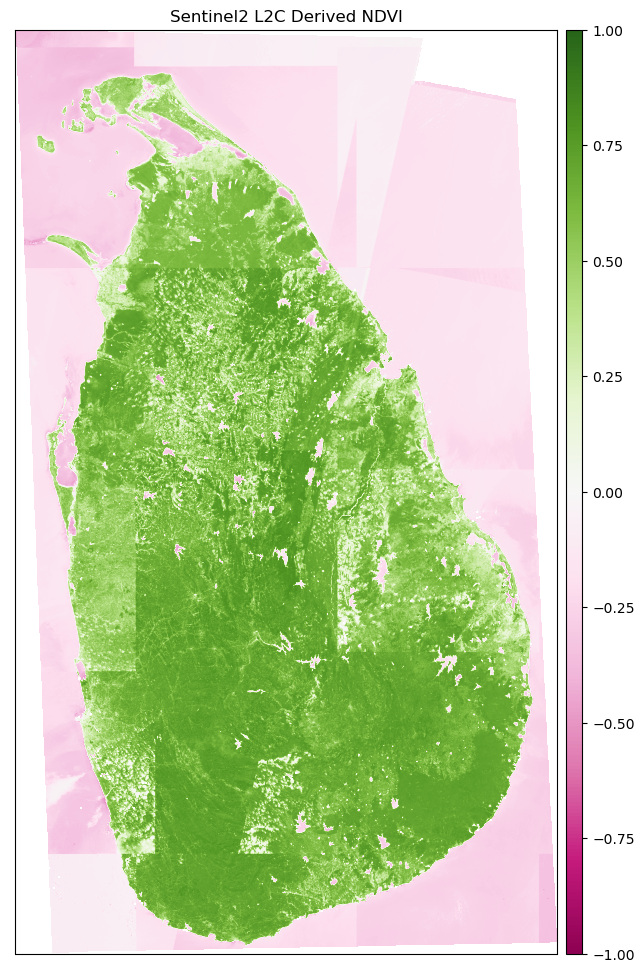

Forest/green cover:  28.39 %


In [22]:
img_path = r'C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Sentinel-hub API\Data\c63cc1c7352bd86d218dbe557a56aa21'
file_name = 'response.tiff'

# read the .tiff file
file = rxr.open_rasterio(img_path+'/'+file_name)

ndvi = ndvi_api(file)
green = green_area(ndvi,185)
green_cover(green,65610)